In [12]:
import numpy as np
import scipy.stats as scs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectKBest, chi2

from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

pd.set_option('precision', 2)
pd.options.display.max_columns = None # Show all columns
pd.options.display.max_rows = None # Show all columns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [18]:
data = pd.read_excel('./project/gcx/gcx3.xlsx')
data.head()

,group,age,sex,education,profession,income,companion,selfcare,children
0,2,1,2,3,1,5,3,4,2
1,2,1,2,3,5,4,5,4,2
2,1,1,2,5,1,5,3,4,2
3,3,1,2,5,4,5,3,4,2
4,3,1,2,5,5,4,3,4,1


In [19]:
# plt.figure(figsize=(12,8))
# plt.subplot(241)
# sns.countplot(x="age", hue="group", data=data);
# plt.subplot(242)
# sns.countplot(x="sex", hue="group", data=data);
# plt.subplot(243)
# sns.countplot(x="education", hue="group", data=data);
# plt.subplot(244)
# sns.countplot(x="profession", hue="group", data=data);
# plt.subplot(245)
# sns.countplot(x="income", hue="group", data=data);
# plt.subplot(246)
# sns.countplot(x="companion", hue="group", data=data);
# plt.subplot(247)
# sns.countplot(x="selfcare", hue="group", data=data);
# plt.subplot(248)
# sns.countplot(x="children", hue="group", data=data);
# plt.savefig('group.svg')

In [20]:
data[['age', 'group']].groupby(['age','group']).size()

KeyError: "['group'] not in index"

In [21]:
data[['sex', 'group']].groupby(['sex','group']).size()

KeyError: "['group'] not in index"

#### 2.4 文化程度 ( 1. 小学; 2. 初中; 3. 高中; 4. 专科; 5. 本科及以上)

结果：差别不明显，以居家为主，两者比率类似

In [7]:
data[['education', 'group']].groupby(['education','group']).size()

education  group
1          0        173
           1         36
2          0         70
           1         28
3          0         49
           1         17
4          0         32
           1         24
5          0        103
           1         55
dtype: int64

#### 2.5 职业 (1. 企业单位；2. 事业单位； 3. 机关政府单位；4. 个体；5. 无正式工作)

结果：个体及无工作者有家外养老趋势

In [8]:
data[['profession', 'group']].groupby(['profession','group']).size()

profession  group
1           0        201
            1         54
2           0        148
            1         64
3           0         38
            1          4
4           0         24
            1         16
5           0         16
            1         22
dtype: int64

#### 2.6 收入 (1. 1万及以上; 2. 8000 ~ 1万; 3. 5000 ~ 7999; 4. 2000 ~ 4999; 5. 2000元及以下)

结果：低收入者有家外养老趋势，文化程度、职业、收入，三者关系待研究

In [9]:
data[['income', 'group']].groupby(['income','group']).size()

income  group
1       0         35
        1         20
2       0         42
        1         22
3       0        127
        1         35
4       0        110
        1         41
5       0        113
        1         42
dtype: int64

#### 2.7 伴侣（1. 老伴； 2. 子女； 3. 老伴子女； 4. 独居； 5. 其他）

结果：独居者对居家无明显偏好。

In [10]:
data[['companion', 'group']].groupby(['companion','group']).size()

companion  group
1          0        261
           1         57
2          0         31
           1         27
3          0         60
           1         36
4          0         67
           1         24
5          0          8
           1         16
dtype: int64

#### 2.8 自理能力（1. 完全自理；2. 基本自理; 3. 半自理; 4. 不能自理）

结果：各项比例类似，完全自理者倾向居家养老。

In [17]:
data[['selfcare', 'group']].groupby(['selfcare','group']).size()

KeyError: "None of [Index(['selfcare', 'group'], dtype='object')] are in the [columns]"

#### 2.9 子女数量 （0. 0; 1. 1; 2. 2; 3. >=3）

结果：结果比率类似

In [12]:
data[['children', 'group']].groupby(['children','group']).size()

children  group
0         0         20
          1         14
1         0        148
          1         40
2         0        225
          1         70
3         0         34
          1         36
dtype: int64

### 3. 相互关系

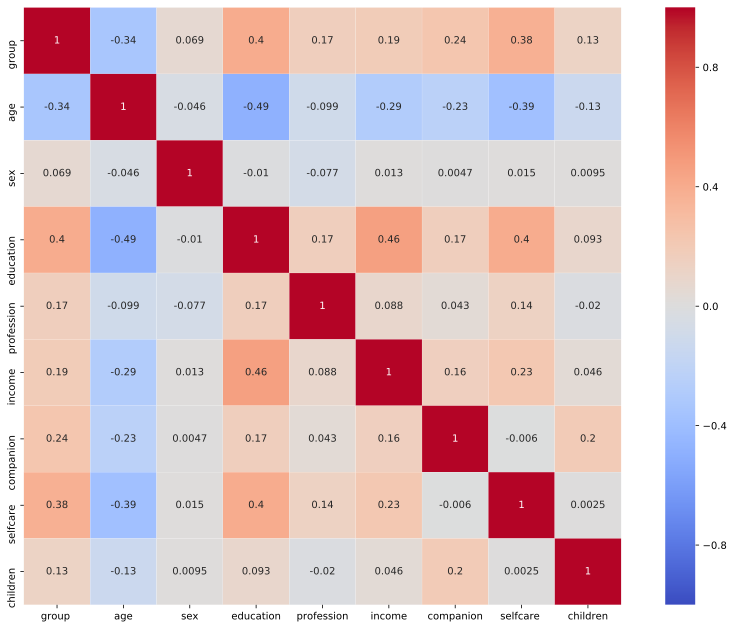

In [22]:
plt.figure(figsize=(16, 11))

sns.heatmap(data.astype(float).corr(method='kendall'), linewidths=0.1, square=True,
            cmap='coolwarm', linecolor='white', annot=True, vmax=1, vmin=-1);
# plt.savefig('heatmap.svg')

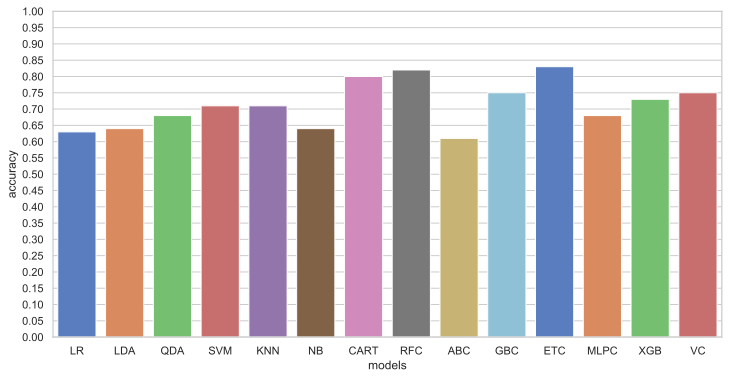

In [25]:
X, y = data.values[:,1:], data.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

models = {
    'LR'  : LogisticRegression(),
    'LDA' : LinearDiscriminantAnalysis(),
    'QDA' : QuadraticDiscriminantAnalysis(),
    'SVM' : SVC(),
    'KNN' : KNeighborsClassifier(),
    'NB'  : GaussianNB(),
    'CART': DecisionTreeClassifier(),
    'RFC' : RandomForestClassifier(),
    'ABC' : AdaBoostClassifier(),
    'GBC' : GradientBoostingClassifier(),
    'ETC' : ExtraTreesClassifier(),
    'MLPC': MLPClassifier(),
    'XGB' : XGBClassifier()
}

models['VC'] = VotingClassifier(estimators=[
    ('lr', models['LR']), ('lda', models['LDA']), ('qda', models['QDA']),
    ('svm', models['SVM']),('knn', models['KNN']), ('nb', models['NB']), 
    ('cart', models['CART']), ('rfc', models['RFC']), ('abc', models['ABC']),
    ('gbc', models['GBC']), ('etc', models['ETC']), ('mlpc', models['MLPC']),
    ('xgb', models['XGB'])], voting='hard')

kfold = StratifiedKFold(n_splits=10, random_state=0)

cv_results = []

for key in models:
        cv_score = cross_val_score(models[key], X_train, y_train, scoring="accuracy", cv=kfold)
        cv_mean = round(cv_score.mean(), 2)
        cv_result = {'models': key, 'accuracy': cv_mean}
        cv_results.append(cv_result)

cv_results = pd.DataFrame(cv_results)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
cv_plot = sns.barplot(x='models', y='accuracy', data=cv_results, palette="muted");
cv_plot.set_yticks(np.arange(0, 1.05, 0.05));
# plt.savefig('modelselection.svg')

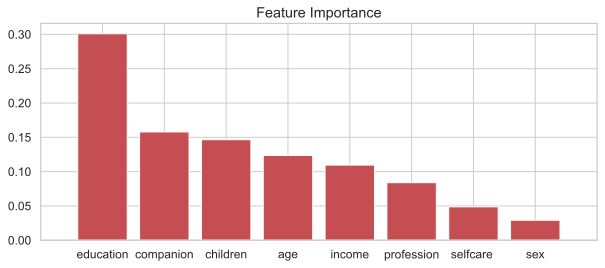

In [26]:
models['CART'].fit(X_train, y_train)
skplt.estimators.plot_feature_importances(models['CART'], feature_names=data.columns[1:], figsize=(10, 4))
# plt.savefig('feature.svg')

In [27]:
# cv_means = []
# cv_scores = []
# X, y = data.values[:, 1:], data.values[:, 0]   
# for i in range(1,data.shape[1]): 
#     ch2=SelectKBest(chi2, k=i)
#     fX = ch2.fit_transform(X, y)
#     fX_train, fX_test, fy_train, fy_test = train_test_split(fX, y, random_state=0)
#     fmodel = DecisionTreeClassifier(random_state=0)
#     fmodel.fit(fX_train, fy_train)
#     cv_score = cross_val_score(fmodel, fX_train, fy_train, scoring="f1", cv=kfold)
#     cv_mean = round(cv_score.mean(), 2)
#     cv_means.append(cv_mean)

# plt.figure(figsize=(6,4))
# plt.title("Feature Cross_Validation Score Curve") 
# plt.xlabel("Feature Number") 
# plt.ylabel("f1_Score") 
# plt.plot(range(1, fX_train.shape[1]+1), cv_means)
# plt.savefig('featurecv.svg')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

#### 4.2 参数调节

In [28]:
parameters = {
                'max_depth': range(1,100),
}

grid_obj = GridSearchCV(models['CART'], param_grid=parameters, scoring='accuracy', cv=kfold)

grid_fit = grid_obj.fit(X_train, y_train)

best_estimator = grid_fit.best_estimator_

best_estimator.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=35, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

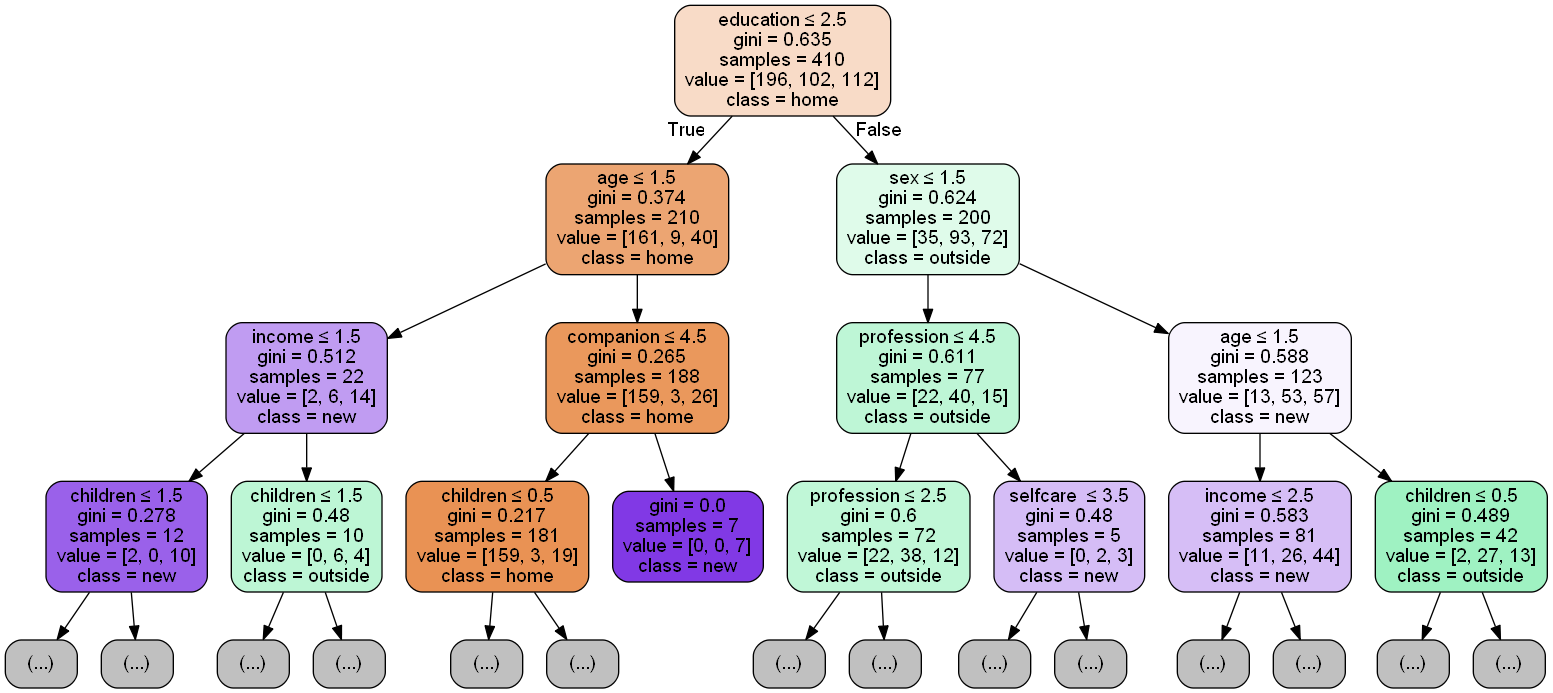

In [31]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(best_estimator, out_file=None, 
                         feature_names=data.columns[1:],  
                         class_names=['home','outside','new'],  
                         filled=True, rounded=True,  
                         special_characters=True,
                         max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 
# graph.write_svg('tree.svg')

#### 4.3 模型评价

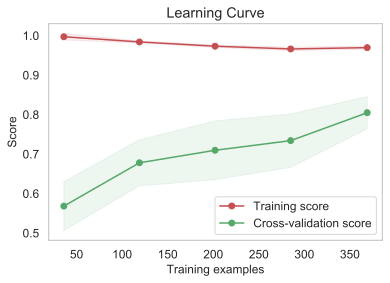

In [32]:
skplt.estimators.plot_learning_curve(best_estimator, X_train, y_train, cv=10)
# plt.savefig('learncurve.svg')

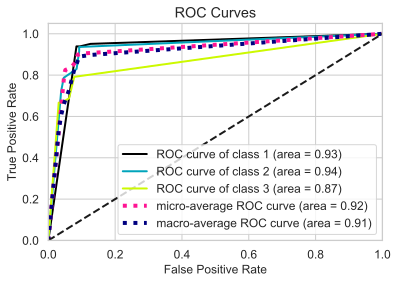

In [33]:
predicted_probas = best_estimator.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
# plt.savefig('roc.svg')

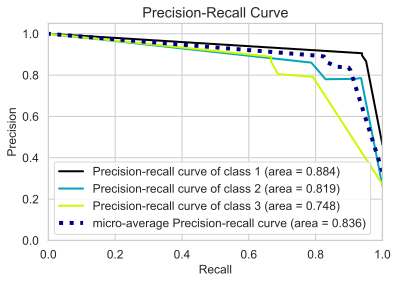

In [34]:
y_probas = best_estimator.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
# plt.savefig('prcurve.svg')

precision    recall  f1-score   support

           1       0.90      0.94      0.92        82
           2       0.78      0.89      0.83        47
           3       0.86      0.67      0.75        48

    accuracy                           0.85       177
   macro avg       0.85      0.83      0.83       177
weighted avg       0.86      0.85      0.85       177



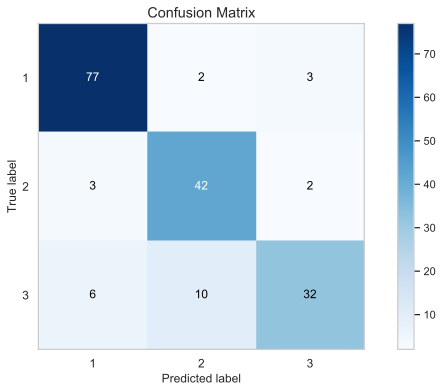

In [44]:
y_pred = best_estimator.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[1,2,3], figsize=(12,6))
plt.savefig('confusionmatrix.svg')
print(classification_report(y_test, y_pred))

In [41]:
cv_score = cross_val_score(best_estimator, X_train, y_train, scoring="accuracy", cv=kfold)
cv_mean = round(cv_score.mean(), 2)
print(cv_score)
print(cv_mean)

[0.80487805 0.82926829 0.75609756 0.7804878  0.85365854 0.73170732
 0.7804878  0.82926829 0.82926829 0.7804878 ]
0.8
